In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
train_data = pd.read_csv('/content/mnist_train.csv')

In [ ]:
# train_data = pd.read_csv('/content/fashion-mnist_train.csv')

In [ ]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data.shape

(16623, 785)

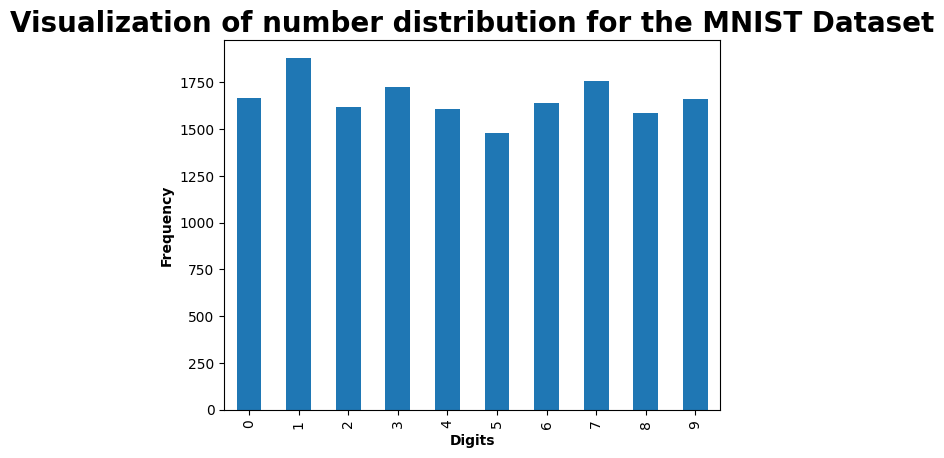

In [ ]:
train_data['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Visualization of number distribution for the MNIST Dataset', fontsize=20, weight='bold')
plt.xlabel('Digits',weight='bold')
plt.ylabel('Frequency',weight='bold')
plt.show()

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16623 entries, 0 to 16622
Columns: 785 entries, label to 28x28
dtypes: float64(162), int64(623)
memory usage: 99.6 MB


In [ ]:
train_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,16623.000000,16623.0,16623.0,16623.0,16623.0,16623.0,16623.0,16623.0,16623.0,16623.0,...,16622.000000,16622.000000,16622.000000,16622.000000,16622.000000,16622.0,16622.0,16622.0,16622.0,16622.0
mean,4.446129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194983,0.132535,0.089761,0.054326,0.024606,0.0,0.0,0.0,0.0,0.0
std,2.894710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.925287,4.715930,4.217209,3.056218,1.644453,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,154.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = train_data.drop(['label'], axis=1)
y = train_data['label']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16623 entries, 0 to 16622
Columns: 784 entries, 1x1 to 28x28
dtypes: float64(162), int64(622)
memory usage: 99.4 MB


In [ ]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

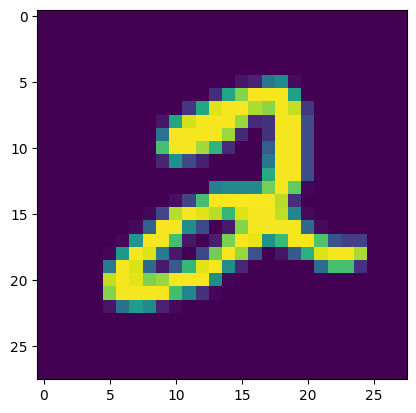

In [ ]:
print_image(5, x)

In [ ]:
imputer = SimpleImputer(strategy='median')
x = imputer.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
clf = DecisionTreeClassifier(max_depth=40)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=40)

In [ ]:
accuracy = clf.score(x_test, y_test)
print('Validation accuracy: %.2f%%' % (100 * accuracy))

Validation accuracy: 81.62%


In [ ]:
prediction = clf.predict(x_test)
print(confusion_matrix(y_test,prediction))

[[286   0   3   2   1   9   7   1   5   4]
 [  0 340   4   3   4   1   1   4   6   1]
 [  6   6 253  10   9   6   3  10  16   4]
 [  2   4  12 266   7  18   4  11  12   9]
 [  2   5   6   4 245   4   3   3  14  18]
 [  8   7   4  14  10 226   9   1  13   5]
 [  7   4  11   1   6  11 286   2  10   6]
 [  2   4   8   6   3   3   0 307  10  12]
 [  2  15  11  15  16   8   6   7 262  14]
 [  2   2   8   6  21   6   3  17  11 243]]


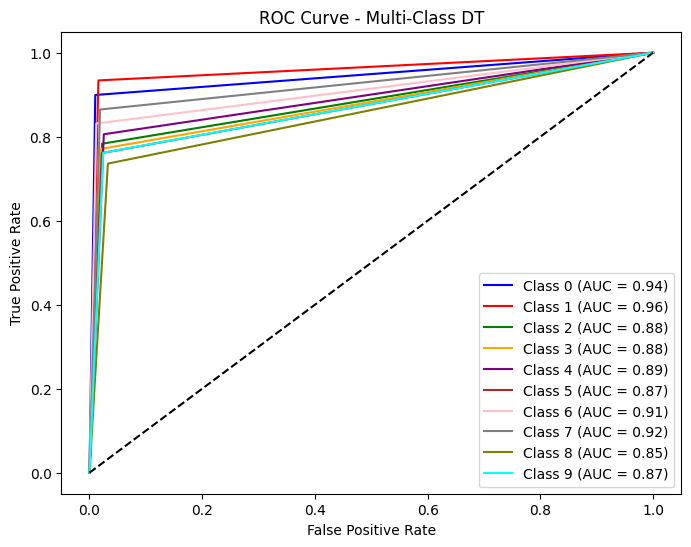

In [ ]:
dt_probs = clf.predict_proba(x_test)

fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(clf.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == clf.classes_[i], dt_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='Class %d (AUC = %.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class DT')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pca = PCA(n_components=30)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
pca_clf = DecisionTreeClassifier(max_depth=40)
pca_clf.fit(x_train_pca,y_train)

DecisionTreeClassifier(max_depth=40)

In [ ]:
accuracy = pca_clf.score(x_test_pca, y_test)
print('Validation accuracy: %.2f%%' % (100 * accuracy))

Validation accuracy: 78.56%


In [ ]:
prediction1 = pca_clf.predict(x_test_pca)
print(confusion_matrix(y_test,prediction1))

[[279   1   6   9   1  10   5   0   5   2]
 [  0 342   3   5   2   2   2   2   4   2]
 [  8   5 249  13   6   4   5  13  17   3]
 [  8   5  11 254   6  23   6   6  24   2]
 [  3   4   5   5 208  11   5   8   8  47]
 [  6   4  11  27   4 210  10   3  15   7]
 [ 13   2  13   5  11   9 280   1   3   7]
 [  1   2  10   2   7   2   2 297   8  24]
 [  7   7  16  20   9  14   4   6 258  15]
 [  2   0   6   4  32   6   3  23   8 235]]


In [ ]:
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
accuracy = rf.score(x_test, y_test)
print('Validation accuracy: %.2f%%' % (100 * accuracy))

Validation accuracy: 95.34%


In [ ]:
prediction = rf.predict(x_test)

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       318
           1       0.97      0.99      0.98       364
           2       0.94      0.94      0.94       323
           3       0.96      0.92      0.94       345
           4       0.96      0.94      0.95       304
           5       0.97      0.96      0.96       297
           6       0.96      0.98      0.97       344
           7       0.95      0.95      0.95       355
           8       0.93      0.92      0.92       356
           9       0.92      0.96      0.94       319

    accuracy                           0.95      3325
   macro avg       0.95      0.95      0.95      3325
weighted avg       0.95      0.95      0.95      3325



In [ ]:
labels = [0, 1,2,3,4,5,6,7,8,9]
print(confusion_matrix(y_test,prediction,labels=labels))

[[314   0   1   0   0   1   0   0   1   1]
 [  0 360   1   1   0   1   0   0   0   1]
 [  2   2 304   3   1   0   1   4   5   1]
 [  1   2   4 316   1   6   1   7   5   2]
 [  1   0   3   0 287   0   3   1   2   7]
 [  1   0   1   2   0 284   4   0   3   2]
 [  1   2   0   0   1   0 338   0   2   0]
 [  1   3   5   0   2   0   0 336   4   4]
 [  0   4   4   3   3   2   3   1 326  10]
 [  2   0   0   3   3   0   1   4   1 305]]


In [ ]:
accuracy = accuracy_score(y_test,prediction)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 95.34%


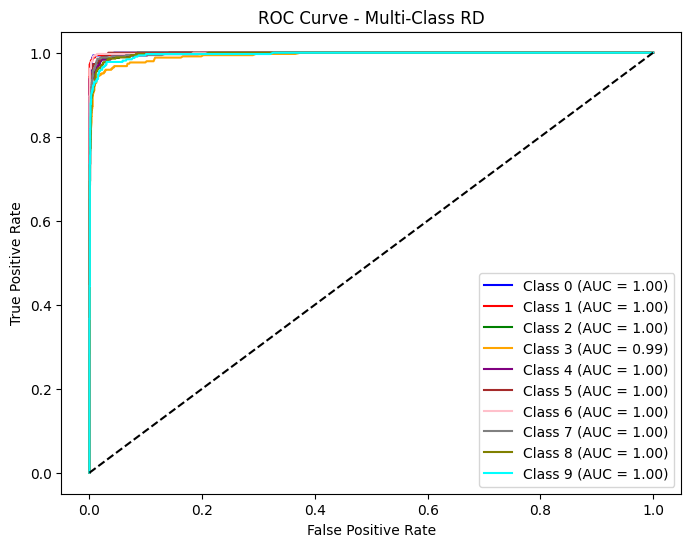

In [ ]:
dt_probs = rf.predict_proba(x_test)

fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(rf.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == rf.classes_[i], dt_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='Class %d (AUC = %.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class RD')
plt.legend(loc='lower right')
plt.show()